(cartopy)=

# Cartopy

Cartopy is a python library that can be used in combination with matplotlib to create geographical maps. 

Starting in 2016, The Cartopy Project began development as a replacement for Basemap.

Cartopy has 28 people listed as contributors.

If you use `conda`,  cartopy can be installed with 
`conda install -c conda-forge cartopy`, which takes care of the
dependencies such as `proj`, `geos`, `pyshp`, `shapely`, etc.

If you use `pip`, the system dependencies need to be installed first
before running `pip install cartopy`. See
<https://scitools.org.uk/cartopy/docs/latest/installing.html>
for detailed instructions.

Pros of Cartopy:

- Relatively easy to learn
- Many different types of mapping projections
- Great options to color in the map

Cons of Cartopy:

- Slow loading times for complex maps
- Alternate files often required for high precision mapping

Sources: 

- https://matplotlib.org/basemap/
- https://scitools.org.uk/cartopy/docs/latest/
- https://www.youtube.com/watch?v=4M2aiHvhr5Y

In [1]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Basic Plot

To create a cartopy plot, simply set a variable (m for map) to `plt.axes()` with a projection argument. Then add coastlines so the graph has a visible element.

/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


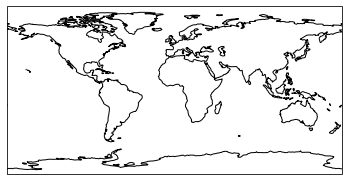

In [2]:
m = plt.axes(projection=ccrs.PlateCarree())
m.coastlines()

## Advanced Graph

By using `add_feature`, we can add more geographic information to our graph. `gridlines` will add longitude and latitude lines to the graph.

/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:180: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/numpy/lib/function_base.py:5392: ShapelyDeprecationWarning: The

/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


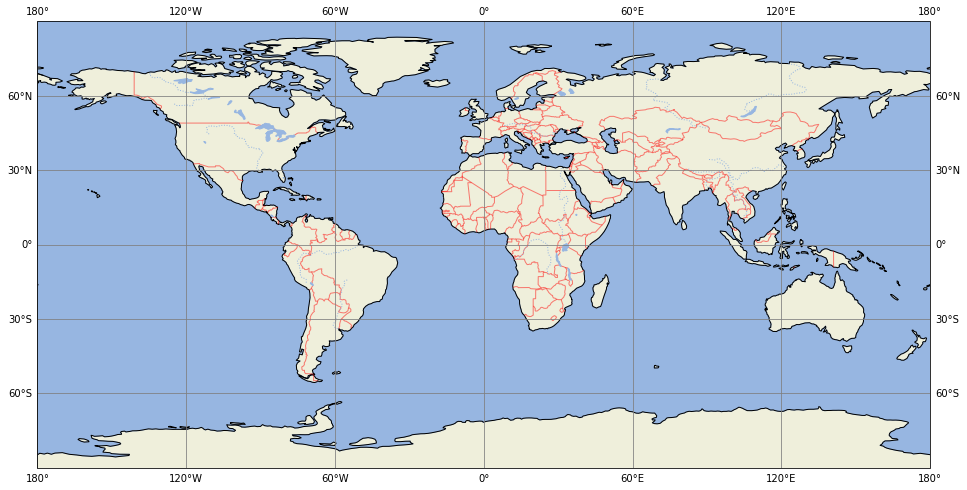

In [3]:
plt.figure(figsize=(16,12))
m = plt.axes(projection=ccrs.PlateCarree())

m.add_feature(cfeature.LAND)
m.add_feature(cfeature.OCEAN)
m.add_feature(cfeature.COASTLINE)
m.add_feature(cfeature.BORDERS, color = "red", alpha = 0.5)
m.add_feature(cfeature.LAKES)
m.add_feature(cfeature.RIVERS, linestyle = ':')

m.gridlines(draw_labels=True, color = "gray")

## Projection Comparison

Here are some examples of different projections.

/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


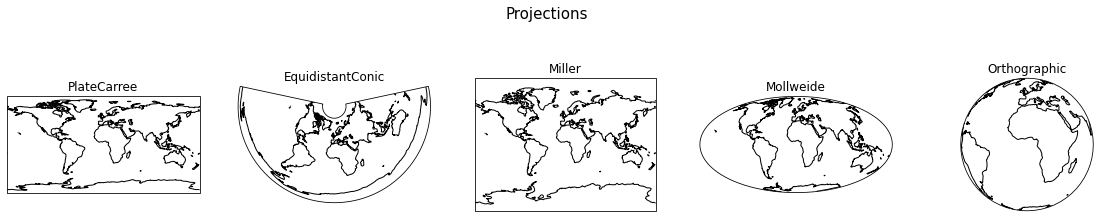

In [4]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Projections', fontsize = 15, y = 0.93)

projections = {'PlateCarree': ccrs.PlateCarree(),
               'EquidistantConic': ccrs.EquidistantConic(),
               'Miller': ccrs.Miller(), 
               'Mollweide': ccrs.Mollweide(), 
               'Orthographic': ccrs.Orthographic()}

for index, projection in enumerate(projections.items()):
    ax = fig.add_subplot(7, 5, index+1, projection=projection[1])
    ax.coastlines()
    ax.set_title(projection[0])

## Plotting Specific Locations

If you only want to plot a certain area of the map, you can specify `set_extent`. To do this, specify a list of points `[lowest longitude, highest longitude, lowest latidude, highest latitude]` as well as the projection (optionally).

/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


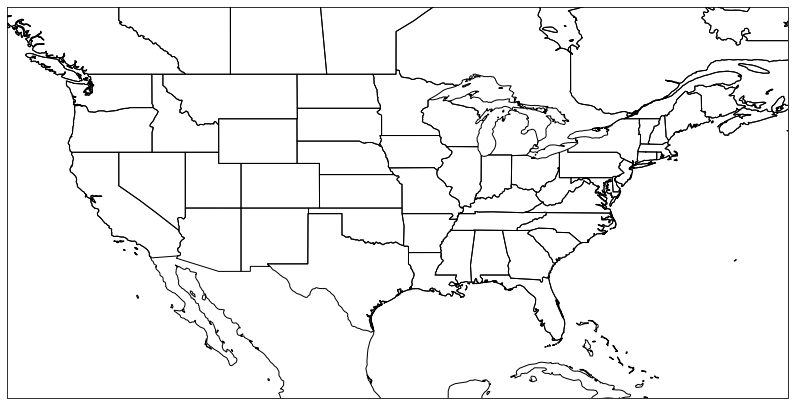

In [5]:
fig = plt.figure(figsize=(14, 14))
m = plt.axes(projection=ccrs.PlateCarree())
# (x0, x1, y0, y1)
m.set_extent([-130, -60, 20, 55], ccrs.PlateCarree())         
m.add_feature(cfeature.STATES)
m.coastlines()

## Reading Shape Files

If you would like to plot one area without the adjacent landscape, you can use a shape file via `Reader` from `cartopy.io.shapereader`.

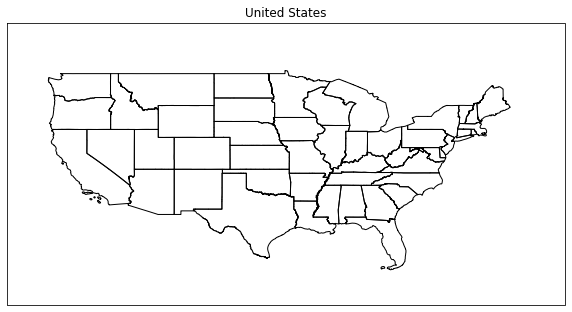

In [6]:
# get shape file
reader = shpreader.Reader('../data/state/tl_2021_us_state.dbf')

# convert shape file to format that cartopy can work with
states = list(reader.geometries())
STATES = cfeature.ShapelyFeature(states, ccrs.PlateCarree())

# create plot
plt.figure(figsize=(10, 6))
m = plt.axes(projection=ccrs.PlateCarree())
plt.title("United States")
m.set_extent([-130, -60, 20, 50])
m.add_feature(STATES, facecolor='none', edgecolor='black')

Here is a plot of New York City that we will use later.

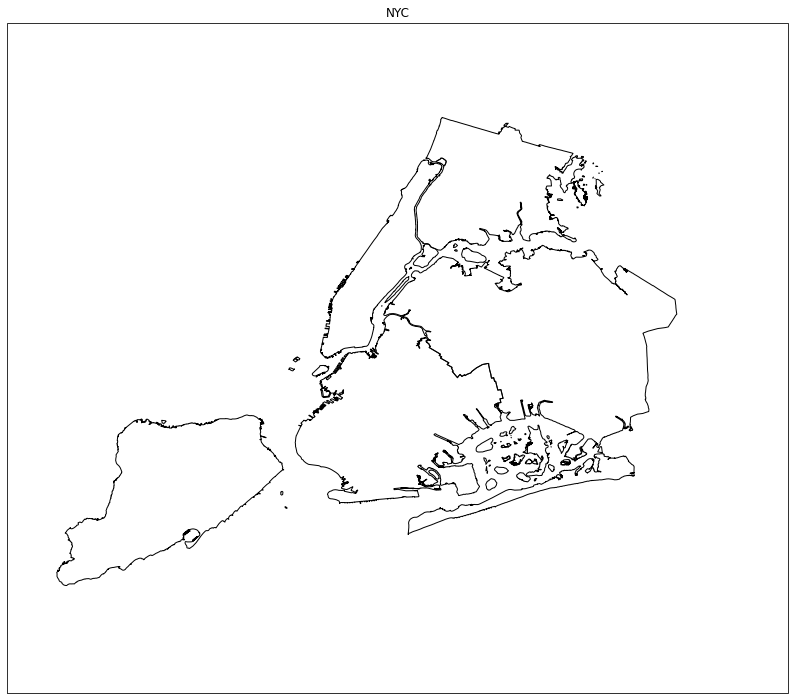

In [7]:
# get shape file
reader = shpreader.Reader('../data/nyc/geo_export_a1f96cd2-7ce6-44bb-9568-f3ee8bcba44a.dbf')

# convert shape file to format that cartopy can work with
geom = list(reader.geometries())
GEOM = cfeature.ShapelyFeature(geom, ccrs.PlateCarree())

# create plot
plt.figure(figsize=(14, 14))
m = plt.axes(projection=ccrs.PlateCarree())
plt.title("NYC")
m.set_extent([-74.3, -73.6, 40.4, 41])
m.add_feature(GEOM, facecolor='none', edgecolor='black')

## Data Cleaning

Before we can work with the NYC Collisions Dataset, we need to do some data cleaning.

In [8]:
df = pd.read_csv("../data/nyc_mv_collisions_202201.csv")
print(df.shape)
df.head()

(7659, 29)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/01/2022,7:05,NaN,NaN,NaN,NaN,NaN,EAST 128 STREET,3 AVENUE BRIDGE,NaN,...,NaN,NaN,NaN,NaN,4491172,Sedan,NaN,NaN,NaN,NaN
1,01/01/2022,14:43,NaN,NaN,40.769993,-73.915825,"(40.769993, -73.915825)",GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,NaN,4491406,Sedan,Sedan,NaN,NaN,NaN
2,01/01/2022,21:20,QUEENS,11414.0,40.657230,-73.841380,"(40.65723, -73.84138)",91 STREET,160 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4491466,Sedan,NaN,NaN,NaN,NaN
3,01/01/2022,4:30,NaN,NaN,NaN,NaN,NaN,Southern parkway,Jfk expressway,NaN,...,Unspecified,NaN,NaN,NaN,4491626,Sedan,Sedan,NaN,NaN,NaN
4,01/01/2022,7:57,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,SHERIDAN EXPRESSWAY,NaN,...,NaN,NaN,NaN,NaN,4491734,Sedan,NaN,NaN,NaN,NaN


As we can see from the plot below, there are some issues with our dataset.

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

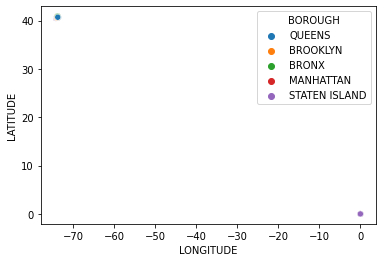

In [9]:
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df, hue = "BOROUGH")

Some points have the coordinates `(0, 0)` so we need to remove them from the dataset. We can also remove the rows in which the longitude/latitude data is missing.

In [10]:
# drop rows with longitude == 0
df[df.LONGITUDE == 0] = np.nan

# make sure bad latitude values are all removed now
print(df.LATITUDE.isna().sum())
print(df.loc[df.LATITUDE == 0].shape[0])

df.head()

582
0


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/01/2022,7:05,NaN,NaN,NaN,NaN,NaN,EAST 128 STREET,3 AVENUE BRIDGE,NaN,...,NaN,NaN,NaN,NaN,4491172.0,Sedan,NaN,NaN,NaN,NaN
1,01/01/2022,14:43,NaN,NaN,40.769993,-73.915825,"(40.769993, -73.915825)",GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,NaN,4491406.0,Sedan,Sedan,NaN,NaN,NaN
2,01/01/2022,21:20,QUEENS,11414.0,40.657230,-73.841380,"(40.65723, -73.84138)",91 STREET,160 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4491466.0,Sedan,NaN,NaN,NaN,NaN
3,01/01/2022,4:30,NaN,NaN,NaN,NaN,NaN,Southern parkway,Jfk expressway,NaN,...,Unspecified,NaN,NaN,NaN,4491626.0,Sedan,Sedan,NaN,NaN,NaN
4,01/01/2022,7:57,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,SHERIDAN EXPRESSWAY,NaN,...,NaN,NaN,NaN,NaN,4491734.0,Sedan,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7659 entries, 0 to 7658
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     7639 non-null   object 
 1   CRASH TIME                     7639 non-null   object 
 2   BOROUGH                        5010 non-null   object 
 3   ZIP CODE                       5010 non-null   float64
 4   LATITUDE                       7077 non-null   float64
 5   LONGITUDE                      7077 non-null   float64
 6   LOCATION                       7077 non-null   object 
 7   ON STREET NAME                 5607 non-null   object 
 8   CROSS STREET NAME              3606 non-null   object 
 9   OFF STREET NAME                2032 non-null   object 
 10  NUMBER OF PERSONS INJURED      7639 non-null   float64
 11  NUMBER OF PERSONS KILLED       7639 non-null   float64
 12  NUMBER OF PEDESTRIANS INJURED  7639 non-null   f

We can create a plot to show that our data has been successfully cleaned.

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

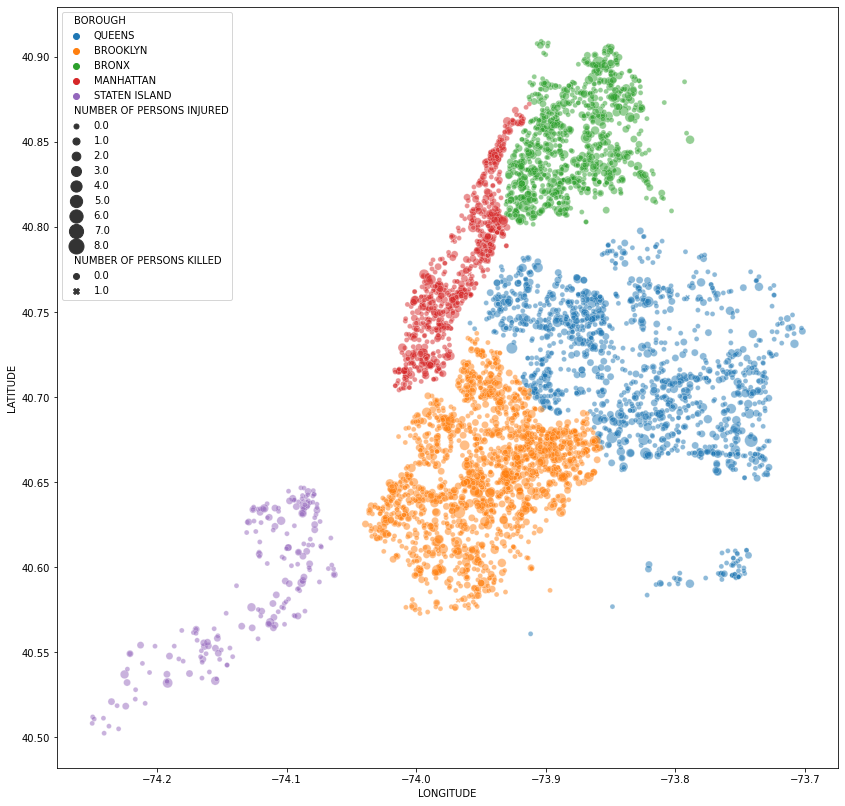

In [12]:
# specify the size of the plot
fig = plt.figure(figsize=(14, 14))

# use seaborn to plot the points
# x and y are just the longitude and latitude from the plot
# data is the dataframe, which tells seaborn to refernce the dataframe for the rest of the arguments
# hue categorizes the colors and style changes the marker to an x if someone was killed
# alpha = 0.5 makes the markers 50% transparent
# size changes the size of the point based on the amount of injuries
# for sizes, I used list concatenation to make each point 25 times bigger
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df,
                hue = 'BOROUGH', style = "NUMBER OF PERSONS KILLED", alpha = 0.5,
                size = "NUMBER OF PERSONS INJURED",
                sizes = [(i+1)*25 for i in range(int(max(df["NUMBER OF PERSONS INJURED"] + 1)))])

## Plotting On Cartopy Map

Using our dataset, we can plot the car crashes on their geographical location.

/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


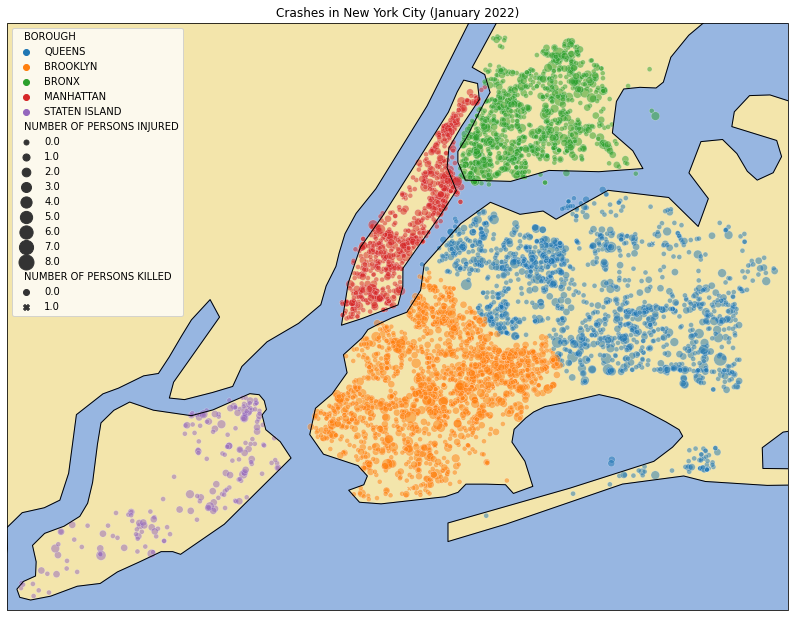

In [13]:
# specify the size of the plot
fig = plt.figure(figsize=(14, 14))

# plot on top of geographical coordinates
m = plt.axes(projection=ccrs.PlateCarree())

# set title
plt.title("Crashes in New York City (January 2022)")

# set geographical location of graph
m.set_extent([np.nanmin(df.LONGITUDE) - 0.01, np.nanmax(df.LONGITUDE) + 0.01,
              np.nanmin(df.LATITUDE) - 0.01, np.nanmax(df.LATITUDE) + 0.01], ccrs.PlateCarree())

# color in the land (the color is just a hex code for a yellow that I though looked good as land)
m.add_feature(cfeature.LAND, color = "#F3E5AB")

# color in the ocean (colors as blue by default)
m.add_feature(cfeature.OCEAN)

# use seaborn to plot the points
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df,
                hue = 'BOROUGH', style = "NUMBER OF PERSONS KILLED", alpha = 0.5,
                size = "NUMBER OF PERSONS INJURED",
                sizes = [(i+1)*25 for i in range(int(max(df["NUMBER OF PERSONS INJURED"] + 1)))])

# if needed, you can add plt.legend(loc = "...") to change the location of the legend

# draw coastlines
m.coastlines()

## Plotting On Cartopy Map Using Shapefile

By making use of a shapefile, we can map with greater precision and omit the locations that are not included in our graph.

<GeoAxesSubplot:title={'center':'Crashes in New York City (January 2022)'}, xlabel='LONGITUDE', ylabel='LATITUDE'>

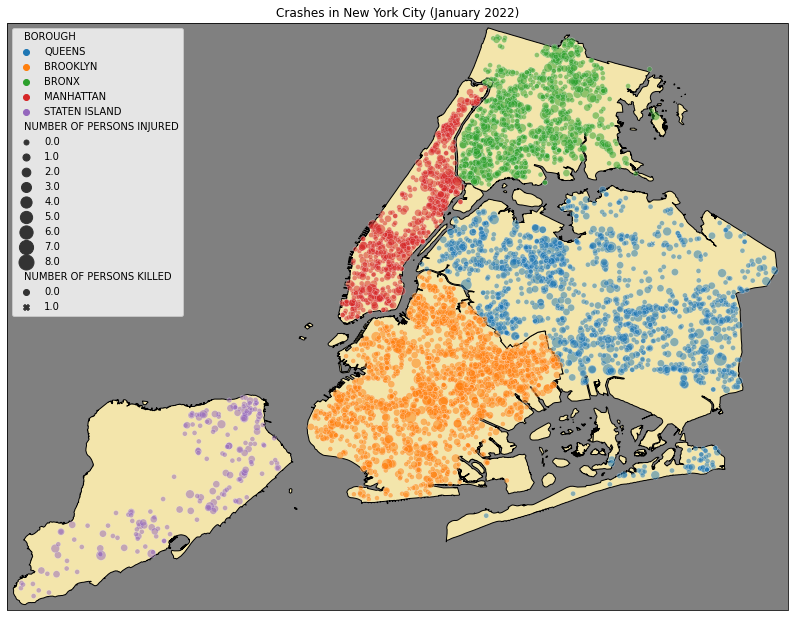

In [14]:
# get shape file
reader = shpreader.Reader('../data/nyc/geo_export_a1f96cd2-7ce6-44bb-9568-f3ee8bcba44a.dbf')

# convert shape file to format that cartopy can work with
geom = list(reader.geometries())
GEOM = cfeature.ShapelyFeature(geom, ccrs.PlateCarree())

# specify the size of the plot
plt.figure(figsize=(14, 14))

# plot on top of geographical coordinates
m = plt.axes(projection=ccrs.PlateCarree())

# make the default color of the plot gray (this ends up just being the background)
m.set_facecolor("gray")

# set title
plt.title("Crashes in New York City (January 2022)")

# set geographical location of graph
m.set_extent([np.nanmin(df.LONGITUDE) - 0.01, np.nanmax(df.LONGITUDE) + 0.01,
              np.nanmin(df.LATITUDE) - 0.01, np.nanmax(df.LATITUDE) + 0.01], ccrs.PlateCarree())

# add the in the New York City geography that was originally read in as a shape file
m.add_feature(GEOM, facecolor = "#F3E5AB", edgecolor='black')

# use seaborn to plot the points
# setting zorder to a high number makes it so the geography does not cover up the points
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df,
                hue = 'BOROUGH', style = "NUMBER OF PERSONS KILLED", alpha = 0.5,
                size = "NUMBER OF PERSONS INJURED",
                sizes = [(i+1)*25 for i in range(int(max(df["NUMBER OF PERSONS INJURED"] + 1)))],
                zorder = 100)

# if needed, you can add plt.legend(loc = "...") to change the location of the legend